In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op
import random
random.seed(42)

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data from all models

In [2]:
model_list = [
    # Main set of models with instruct divide and size variety
    "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct",
    # Small reference model - would allow for pretraining variation
    "gpt2-medium",
    # Other open models
    "allenai/OLMo-2-1124-7B",
    "allenai/OLMo-2-1124-7B-Instruct",
    "mistralai/Ministral-8B-Instruct-2410",
    "google/gemma-7b",
    "google/gemma-7b-it"
]

def read_and_organize_model_results(model_name):
    model_results = pd.read_csv(f"runs/runs-42_07_18/{model_name}-results.csv")
    model_results.replace([0.0], -65504, inplace=True)
    model_results = op.organize_distribution(model_results)
    model_results["model_name"] = model_name.split("/")[-1]
    print(model_name, model_results.output.value_counts())
    return model_results
    
combined_results = [read_and_organize_model_results(model_name) for model_name in model_list]
combined_df = pd.concat(combined_results).reset_index()
combined_df.loc[:, "item"] = combined_df["title"] + combined_df["version"]
combined_df.shape

meta-llama/Llama-3.2-1B output
yes       565
"         255
B         164
A         112
Yes        85
it         48
Harper      7
No          6
Name: count, dtype: int64
meta-llama/Llama-3.2-1B-Instruct output
yes    768
B      267
No     161
        17
\n      11
Yes      9
A        9
Name: count, dtype: int64
meta-llama/Llama-3.2-3B output
yes    846
B      260
no     112
A       14
No       7
C        2
\n       1
Name: count, dtype: int64
meta-llama/Llama-3.2-3B-Instruct output
yes    820
B      259
No      92
no      48
A       17
\n       6
Name: count, dtype: int64
meta-llama/Llama-3.1-8B output
yes    789
B      184
no     177
A       92
Name: count, dtype: int64
meta-llama/Llama-3.1-8B-Instruct output
no     617
yes    272
B      226
No      67
A       50
Yes     10
Name: count, dtype: int64
gpt2-medium output
yes      580
no       253
A        201
"        133
B         71
Genie      3
No         1
Name: count, dtype: int64
allenai/OLMo-2-1124-7B output
yes        556
no      

(14904, 26)

In [3]:
combined_df

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,YES_probs,Yes_probs,...,Other_prob,Aff_prob,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,item
0,0,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_uncovered,it,it depends.\nThe insurance company's definiti...,NaN,-5.554084,0.095245,...,0.836639,0.095245,0.068116,0.095245,0.068116,True,False,0.556171,Llama-3.2-1B,Emergency Damages Iunambiguous_uncovered
1,1,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_covered,it,it depends.\nThe insurance company argues tha...,NaN,-5.560510,0.096750,...,0.836042,0.096750,0.067207,0.096750,0.067207,True,False,0.557145,Llama-3.2-1B,Emergency Damages Iunambiguous_covered
2,2,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",controversial,it,it depends.\nThe insurance company's definiti...,NaN,-5.304534,0.112464,...,0.817047,0.112464,0.070489,0.112464,0.070489,True,False,0.597797,Llama-3.2-1B,Emergency Damages Icontroversial
3,3,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_uncovered,it,it depends.\nThe first thing to note is that ...,NaN,-4.786050,0.141056,...,0.775327,0.141056,0.083616,0.141056,0.083616,True,False,0.681065,Llama-3.2-1B,Emergency Damages IIunambiguous_uncovered
4,4,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_covered,it,it depends.\nThe first thing to note is that ...,NaN,-4.936429,0.120958,...,0.792252,0.120958,0.086790,0.120958,0.086790,True,False,0.652136,Llama-3.2-1B,Emergency Damages IIunambiguous_covered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14899,1237,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,-12.750042,0.000159,...,0.999839,0.367862,0.049785,0.367862,0.049785,True,False,0.713895,gemma-7b-it,Vehicle Glass Iunambiguous_covered
14900,1238,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,controversial,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,-12.541211,0.000153,...,0.999844,0.101144,0.037209,0.101144,0.037209,True,False,0.440780,gemma-7b-it,Vehicle Glass Icontroversial
14901,1239,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_uncovered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,-12.605734,0.000236,...,0.999762,0.257580,0.034860,0.257580,0.034860,True,False,0.617459,gemma-7b-it,Vehicle Glass IIunambiguous_uncovered
14902,1240,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,-12.389812,0.000179,...,0.999820,0.412730,0.043501,0.412730,0.043501,True,False,0.720363,gemma-7b-it,Vehicle Glass IIunambiguous_covered


# Distribution of Agreements

In [10]:
majority_vote_by_model = combined_df.groupby(['title', 'version', 'model_name'], as_index=False, sort=False).aggregate(
     {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
majority_vote_by_model.loc[:, "majority_count"] = majority_vote_by_model[['Covered', 'NotCovered']].max(axis=1)
majority_vote_by_model.shape
table_df = majority_vote_by_model[["model_name", "majority_count"]].value_counts().reset_index(name="Frequency")\
.pivot_table(columns =['majority_count'], index="model_name", aggfunc=np.sum, margins=True)\

table_df.replace(np.nan, 0, inplace=True)
# sns.heatmap(table_df)
table_df

/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_93111/3932444879.py:9: FutureWarning: The provided callable <function sum at 0x7fdc37848ca0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table_df = majority_vote_by_model[["model_name", "majority_count"]].value_counts().reset_index(name="Frequency")\
/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_93111/3932444879.py:9: FutureWarning: The provided callable <function sum at 0x7fdc37848ca0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table_df = majority_vote_by_model[["model_name", "majority_count"]].value_counts().reset_index(name="Frequency")\
/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_93111/3932444879.py:9: FutureWarning: The provided callable

Frequency                               
majority_count                     5      6      7     8    9   All
model_name                                                         
Llama-3.1-8B                    40.0   50.0   48.0   0.0  0.0   138
Llama-3.1-8B-Instruct            8.0   41.0   56.0  29.0  4.0   138
Llama-3.2-1B                    10.0   59.0   69.0   0.0  0.0   138
Llama-3.2-1B-Instruct          129.0    9.0    0.0   0.0  0.0   138
Llama-3.2-3B                    79.0   55.0    4.0   0.0  0.0   138
Llama-3.2-3B-Instruct           77.0   46.0   15.0   0.0  0.0   138
Ministral-8B-Instruct-2410      20.0   67.0   26.0  24.0  1.0   138
OLMo-2-1124-7B                  47.0   64.0   20.0   7.0  0.0   138
OLMo-2-1124-7B-Instruct         51.0   57.0   30.0   0.0  0.0   138
gemma-7b                        44.0   60.0   29.0   5.0  0.0   138
gemma-7b-it                     10.0   33.0   79.0  16.0  0.0   138
gpt2-medium                     50.0   83.0    5.0   0.0  0.0   138
All                            565.0  624.0  381.0  81.0  5.0  1656

In [5]:
majority_vote_by_model[majority_vote_by_model.majority_count == 9]

,title,version,model_name,Covered,NotCovered,majority_count
816,Vehicle Theft V,unambiguous_uncovered,Llama-3.1-8B-Instruct,0,9,9
817,Vehicle Theft V,unambiguous_covered,Llama-3.1-8B-Instruct,0,9,9
818,Vehicle Theft V,controversial,Llama-3.1-8B-Instruct,0,9,9
821,Vehicle Theft VI,controversial,Llama-3.1-8B-Instruct,0,9,9
1321,Wind Damage,unambiguous_covered,Ministral-8B-Instruct-2410,9,0,9


In [6]:
majority_vote_by_model.majority_count.value_counts()

majority_count
6    624
5    565
7    381
8     81
9      5
Name: count, dtype: int64

In [7]:
table_df.to_latex("reports/majority-votes-freq-table.tex", float_format="%.0f")

In [8]:
smaller_prompt_type_mask = (combined_df["prompt_type"].isin(["yes_or_no", "no_or_yes", "agreement", "options", "options_flipped"]))
majority_vote_by_model = combined_df[smaller_prompt_type_mask].groupby(['title', 'version', 'model_name'], as_index=False, sort=False).aggregate(
     {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
majority_vote_by_model.loc[:, "majority_count"] = majority_vote_by_model[['Covered', 'NotCovered']].max(axis=1)
majority_vote_by_model.shape
table_df = majority_vote_by_model[["model_name", "majority_count"]].value_counts().reset_index(name="Frequency")\
.pivot(columns =['majority_count'], index="model_name")\

table_df.replace(np.nan, 0, inplace=True)
# sns.heatmap(table_df)
table_df

Frequency             
majority_count                     3     4      5
model_name                                       
Llama-3.1-8B                    34.0  56.0   48.0
Llama-3.1-8B-Instruct            7.0  83.0   48.0
Llama-3.2-1B                    10.0  59.0   69.0
Llama-3.2-1B-Instruct          129.0   9.0    0.0
Llama-3.2-3B                   100.0  34.0    4.0
Llama-3.2-3B-Instruct           72.0  57.0    9.0
Ministral-8B-Instruct-2410      18.0  72.0   48.0
OLMo-2-1124-7B                  71.0  51.0   16.0
OLMo-2-1124-7B-Instruct         51.0  38.0   49.0
gemma-7b                        53.0  59.0   26.0
gemma-7b-it                     13.0  25.0  100.0
gpt2-medium                    126.0  12.0    0.0

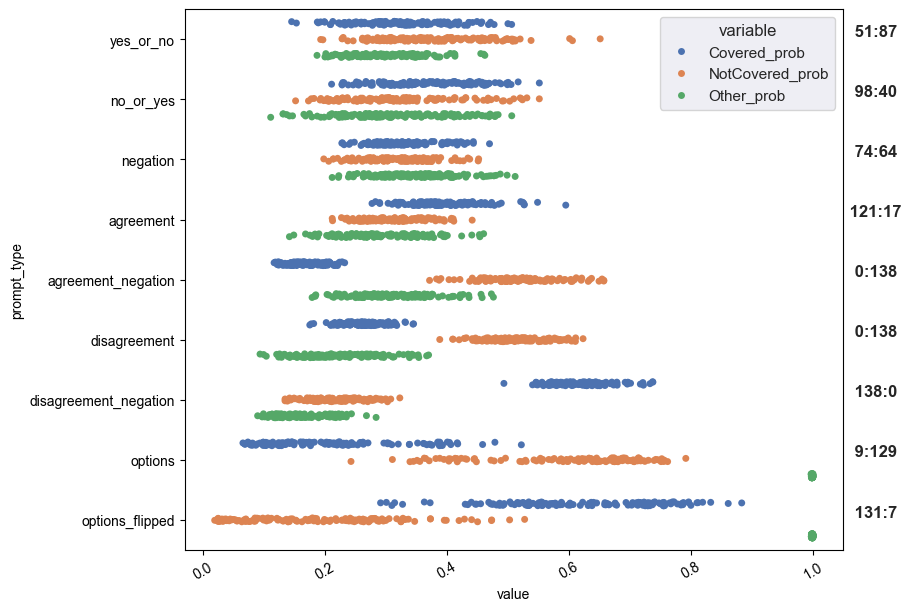

In [13]:
# Melt yes_or_no for the three supported variables
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
model_mask = combined_df["model_name"] == "Llama-3.2-3B-Instruct"
model_results_df = combined_df[model_mask]
count_labels = model_results_df.groupby('prompt_type', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
count_labels


p = sns.stripplot(x='value', y='prompt_type',  hue='variable', jitter=True, dodge=True, data=model_results_df.melt(id_vars = ["prompt_type"], value_vars=["Covered_prob", "NotCovered_prob", "Other_prob"]))
for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
    covered = counts[0]
    not_covered = counts[1]
    ax.text(ax.get_xlim()[1] + 0.05, i, f' {covered}:{not_covered}', 
        ha='center', va='bottom', fontweight='bold')

In [14]:
np_range = lambda x: np.round(np.max(x) - np.min(x), 2)
ranges = combined_df[['model_name', 'prompt_type', 'Covered_prob', 'NotCovered_prob']].melt(id_vars = ['model_name', 'prompt_type'], value_vars=['Covered_prob', 'NotCovered_prob']).groupby(['model_name', 'prompt_type'], as_index=False, sort=False).agg(
 value = pd.NamedAgg('value' , np_range)
)

In [15]:
ranges

,model_name,prompt_type,value
0,Llama-3.2-1B,yes_or_no,0.22
1,Llama-3.2-1B,no_or_yes,0.15
2,Llama-3.2-1B,negation,0.20
3,Llama-3.2-1B,agreement,0.42
4,Llama-3.2-1B,agreement_negation,0.46
...,...,...,...
103,gemma-7b-it,agreement_negation,0.97
104,gemma-7b-it,disagreement,0.87
105,gemma-7b-it,disagreement_negation,0.58
106,gemma-7b-it,options,0.33


/Users/ab-purushothama-macbook/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 [None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None]]

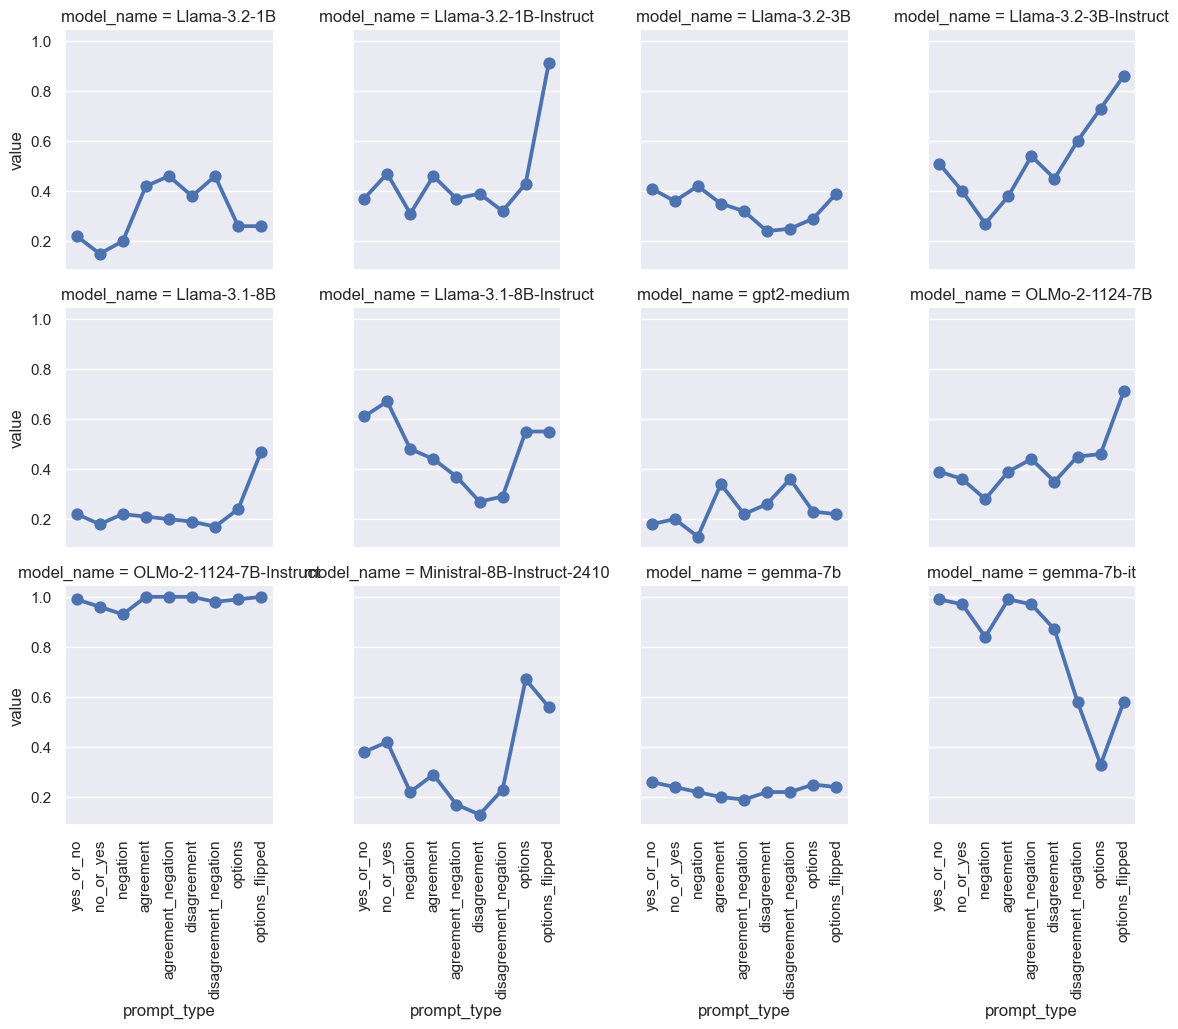

In [16]:
grid = sns.FacetGrid(ranges, col="model_name", col_wrap=4)
grid.map(sns.pointplot, "prompt_type", "value")
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in grid.axes.flat]

In [17]:
ranges

,model_name,prompt_type,value
0,Llama-3.2-1B,yes_or_no,0.22
1,Llama-3.2-1B,no_or_yes,0.15
2,Llama-3.2-1B,negation,0.20
3,Llama-3.2-1B,agreement,0.42
4,Llama-3.2-1B,agreement_negation,0.46
...,...,...,...
103,gemma-7b-it,agreement_negation,0.97
104,gemma-7b-it,disagreement,0.87
105,gemma-7b-it,disagreement_negation,0.58
106,gemma-7b-it,options,0.33


In [18]:
max_ranges = ranges.groupby(['model_name'], as_index=False, sort=False).apply(
    lambda x: x.loc[x.value.idxmax(), :]
)
max_ranges.sort_values(['model_name', 'prompt_type'])
max_ranges

/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_93111/1298629967.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_ranges = ranges.groupby(['model_name'], as_index=False, sort=False).apply(


,model_name,prompt_type,value
0,Llama-3.2-1B,agreement_negation,0.46
1,Llama-3.2-1B-Instruct,options_flipped,0.91
2,Llama-3.2-3B,negation,0.42
3,Llama-3.2-3B-Instruct,options_flipped,0.86
4,Llama-3.1-8B,options_flipped,0.47
5,Llama-3.1-8B-Instruct,no_or_yes,0.67
6,gpt2-medium,disagreement_negation,0.36
7,OLMo-2-1124-7B,options_flipped,0.71
8,OLMo-2-1124-7B-Instruct,agreement,1.00
9,Ministral-8B-Instruct-2410,options,0.67


In [19]:
min_ranges = ranges.groupby(['model_name'], as_index=False, sort=False).apply(
    lambda x: x.loc[x.value.idxmin(), :]
)
min_ranges

/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_93111/2029299256.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_ranges = ranges.groupby(['model_name'], as_index=False, sort=False).apply(


,model_name,prompt_type,value
0,Llama-3.2-1B,no_or_yes,0.15
1,Llama-3.2-1B-Instruct,negation,0.31
2,Llama-3.2-3B,disagreement,0.24
3,Llama-3.2-3B-Instruct,negation,0.27
4,Llama-3.1-8B,disagreement_negation,0.17
5,Llama-3.1-8B-Instruct,disagreement,0.27
6,gpt2-medium,negation,0.13
7,OLMo-2-1124-7B,negation,0.28
8,OLMo-2-1124-7B-Instruct,negation,0.93
9,Ministral-8B-Instruct-2410,disagreement,0.13


In [20]:
min_ranges["prompt_type_max"] = max_ranges["prompt_type"]
min_ranges["max_range"] = max_ranges["value"]

In [21]:
min_ranges

,model_name,prompt_type,value,prompt_type_max,max_range
0,Llama-3.2-1B,no_or_yes,0.15,agreement_negation,0.46
1,Llama-3.2-1B-Instruct,negation,0.31,options_flipped,0.91
2,Llama-3.2-3B,disagreement,0.24,negation,0.42
3,Llama-3.2-3B-Instruct,negation,0.27,options_flipped,0.86
4,Llama-3.1-8B,disagreement_negation,0.17,options_flipped,0.47
5,Llama-3.1-8B-Instruct,disagreement,0.27,no_or_yes,0.67
6,gpt2-medium,negation,0.13,disagreement_negation,0.36
7,OLMo-2-1124-7B,negation,0.28,options_flipped,0.71
8,OLMo-2-1124-7B-Instruct,negation,0.93,agreement,1.00
9,Ministral-8B-Instruct-2410,disagreement,0.13,options,0.67


In [22]:
min_ranges.to_latex("reports/robustness-ranges-prompt-types.tex", float_format="%.2f")

In [23]:
divergences = op.calculate_relative_measures(combined_df)
divergences.shape

(13248, 6)

In [24]:
divergences.js_dist.value_counts()

js_dist
0.608600    1
0.776578    1
0.394538    1
0.696929    1
0.179196    1
           ..
0.204242    1
0.240094    1
0.196068    1
0.023193    1
0.052398    1
Name: count, Length: 13248, dtype: int64

/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_93111/2851007275.py:1: FutureWarning: The provided callable <function mean at 0x7fdc37849ea0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grid = sns.FacetGrid(divergences.groupby(['model_name', 'prompt_type'], as_index=False, sort=False).aggregate(
/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_93111/2851007275.py:1: FutureWarning: The provided callable <function mean at 0x7fdc37849ea0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grid = sns.FacetGrid(divergences.groupby(['model_name', 'prompt_type'], as_index=False, sort=False).aggregate(
/Users/ab-purushothama-macbook/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 [None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None]]

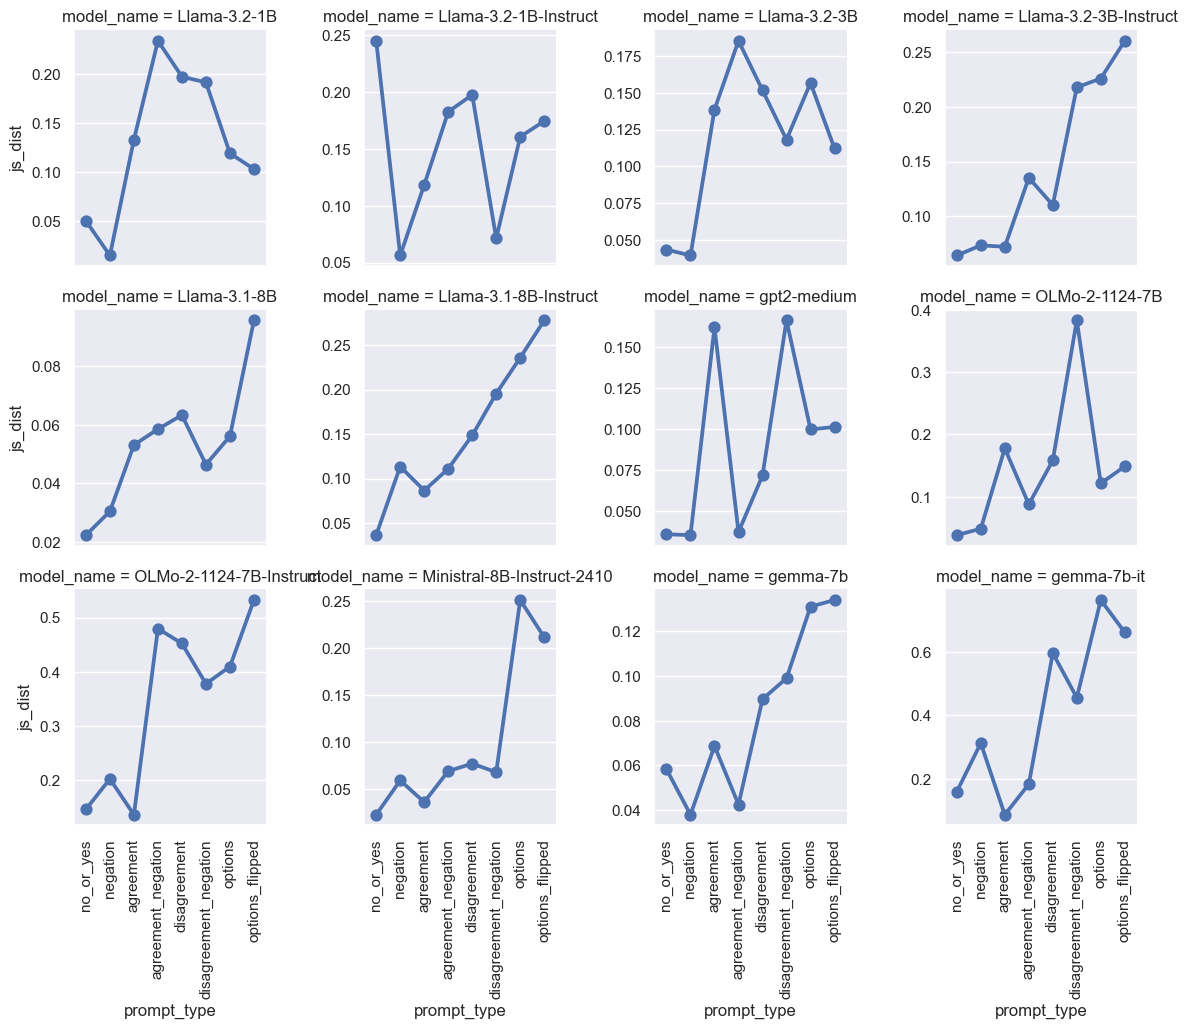

In [25]:
grid = sns.FacetGrid(divergences.groupby(['model_name', 'prompt_type'], as_index=False, sort=False).aggregate(
    js_dist = pd.NamedAgg('js_dist', np.mean),
    kl_div = pd.NamedAgg('kl_div', np.mean),
    
), col="model_name", col_wrap=4, sharey=False)
grid.map(sns.pointplot, "prompt_type", "js_dist")
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in grid.axes.flat]

/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_93111/1257604178.py:1: FutureWarning: The provided callable <function mean at 0x7fdc37849ea0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grid = sns.FacetGrid(divergences.groupby(['model_name', 'prompt_type'], as_index=False, sort=False).aggregate(
/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_93111/1257604178.py:1: FutureWarning: The provided callable <function mean at 0x7fdc37849ea0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grid = sns.FacetGrid(divergences.groupby(['model_name', 'prompt_type'], as_index=False, sort=False).aggregate(
/Users/ab-purushothama-macbook/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 [None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None]]

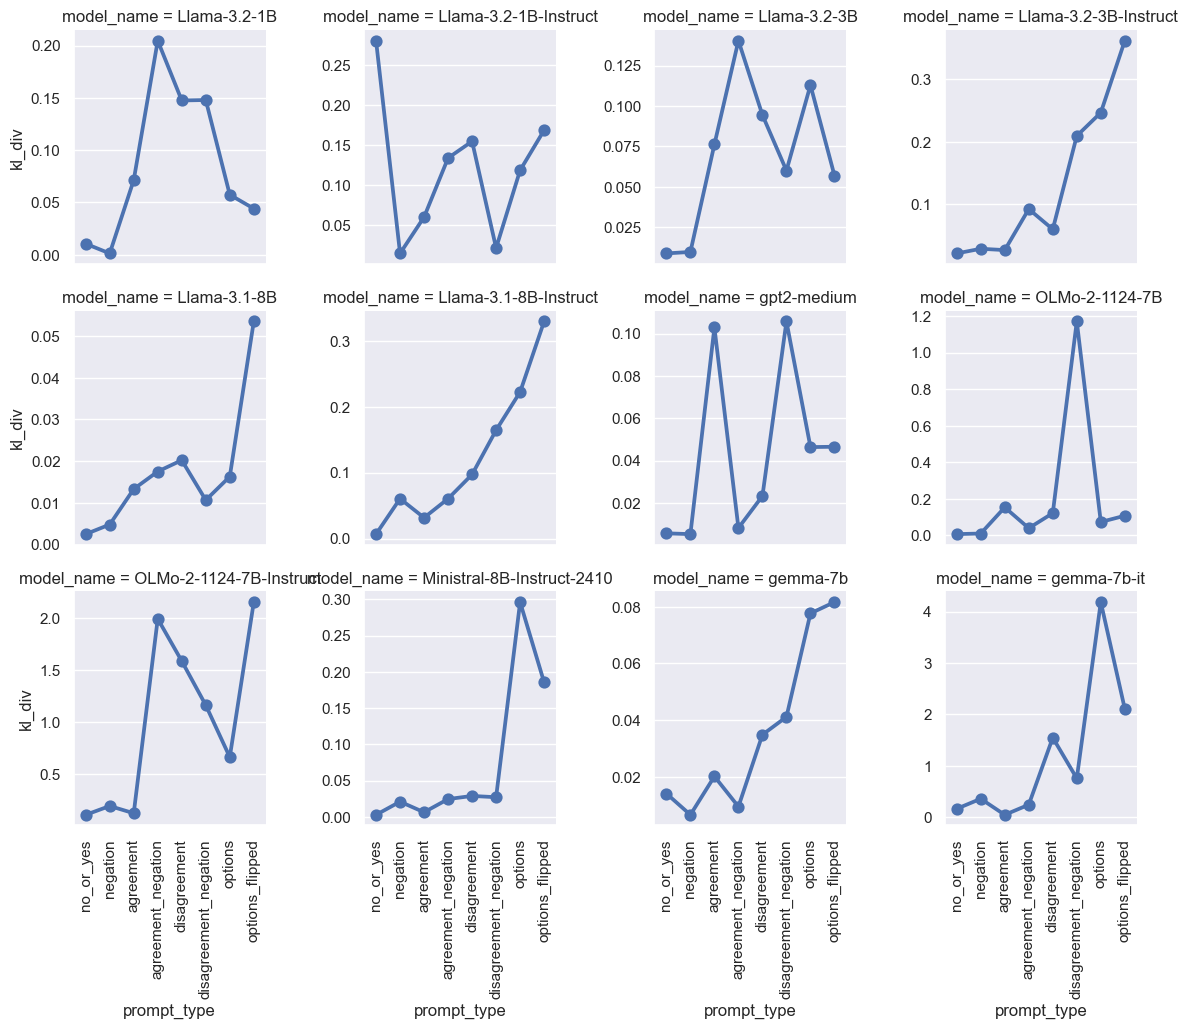

In [26]:
grid = sns.FacetGrid(divergences.groupby(['model_name', 'prompt_type'], as_index=False, sort=False).aggregate(
    js_dist = pd.NamedAgg('js_dist', np.mean),
    kl_div = pd.NamedAgg('kl_div', np.mean),
), col="model_name", col_wrap=4, sharey=False)
grid.map(sns.pointplot, "prompt_type", "kl_div")
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in grid.axes.flat]

In [27]:
max_divergences = divergences.groupby(['model_name', 'prompt_type'], as_index=False, sort=False).aggregate(
    js_dist = pd.NamedAgg('js_dist', np.mean)
).groupby(['model_name'], as_index=False, sort=False).apply(lambda x: x.loc[x.js_dist.idxmax(), :])
max_divergences

/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_93111/1743997700.py:1: FutureWarning: The provided callable <function mean at 0x7fdc37849ea0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  max_divergences = divergences.groupby(['model_name', 'prompt_type'], as_index=False, sort=False).aggregate(
/var/folders/9g/y4xr1pr156905g16w5kjh4qh0000gn/T/ipykernel_93111/1743997700.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).groupby(['model_name'], as_index=False, sort=False).apply(lambda x: x.loc[x.js_dist.idxmax(), :])


,model_name,prompt_type,js_dist
0,Llama-3.2-1B,agreement_negation,0.234301
1,Llama-3.2-1B-Instruct,no_or_yes,0.244847
2,Llama-3.2-3B,agreement_negation,0.185209
3,Llama-3.2-3B-Instruct,options_flipped,0.260064
4,Llama-3.1-8B,options_flipped,0.095668
5,Llama-3.1-8B-Instruct,options_flipped,0.277773
6,gpt2-medium,disagreement_negation,0.166143
7,OLMo-2-1124-7B,disagreement_negation,0.382940
8,OLMo-2-1124-7B-Instruct,options_flipped,0.532485
9,Ministral-8B-Instruct-2410,options,0.250857


In [28]:
max_divergences.to_latex("reports/robustness-prompt-type-distance.tex", float_format="%0.2f", index=False)

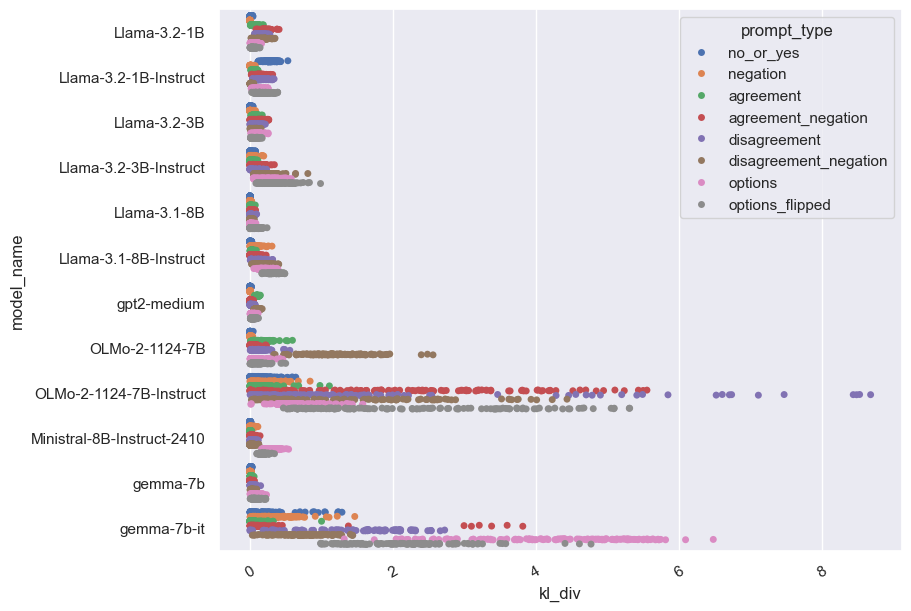

In [29]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")

p = sns.stripplot(x='kl_div', y='model_name',  hue='prompt_type', jitter=True, dodge=True, data=divergences)

In [30]:
# # fig, ax = plt.subplots(4, 4, figsize=(9,6), layout='constrained')
# # fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
# sns.displot(
#     divergences, x="kl_div", col="model_name", row="model_name"    
# )
# # for i, group in enumerate(divergences.groupby(['model_name'], as_index=False, sort=False)):
# #     model_name, data = group
# #     fig_ax = ax[int(i/4), i%4]
# #     # fig_ax = ax
# #     sns.stripplot(x='kl_div', y='prompt_type',  hue='prompt_type', data=data, ax=fig_ax)#jitter=True, dodge=True,)

In [31]:
# grid = sns.FacetGrid(
#     divergences,
#     col="model_name", 
#     hue="prompt_type",
#     gridspec_kws={"nrows": 4, "ncols":4}
# )

# grid.map(sns.stripplot, "kl_div", "prompt_type")

<Axes: xlabel='prompt_type', ylabel='js_dist'>

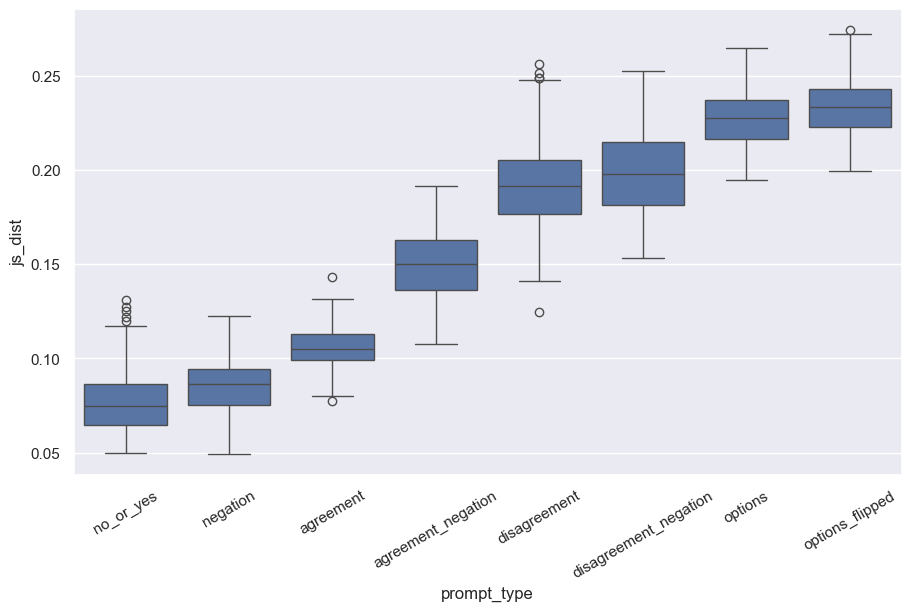

In [32]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
sns.boxplot(data=divergences.groupby(['title', 'version', 'prompt_type'], as_index=False, sort=False).aggregate({"js_dist": "mean"}), 
           x='prompt_type', y = "js_dist",)

In [33]:
combined_df.sample()

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,YES_probs,Yes_probs,...,Other_prob,Aff_prob,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,item
2851,367,Ground Heave II,negation,"Clint has home insurance that covers ""Ground H...",unambiguous_covered,yes,"yes.\nThe reason is that ""ground heave"" is a ...",NaN,-4.040627,0.375207,...,0.505364,0.375207,0.119428,0.375207,0.119428,True,False,0.966496,Llama-3.2-3B,Ground Heave IIunambiguous_covered


## Distribution of minority judgments across prompt types

In [34]:
# Distribution of minority judgments across prompt types
majority_vote_by_model = combined_df.groupby(['title', 'version', 'model_name'], as_index=False, sort=False).aggregate(
     {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
majority_vote_by_model.loc[:, "majority"] = majority_vote_by_model.apply(lambda x: "Covered" if x.Covered >= x.NotCovered else "Not Covered",  axis=1)
# table_df = majority_vote_bye_model[["model_name", "majority_count"]].value_counts().reset_index(name="Frequency")\
# .pivot(columns =['majority_count'], index="model_name")
combined_df.loc[combined_df.Covered == True, "judgment"] = "Covered"
combined_df.loc[combined_df.NotCovered == True, "judgment"] = "Not Covered"
# table_df.replace(np.nan, 0, inplace=True)
# # sns.heatmap(table_df)
# table_df
combined_df.loc[:, "in_minority"]= False
for index, row in majority_vote_by_model.iterrows():
    item_model_mask = (combined_df["title"] == row.title) & (combined_df["version"] == row.version) & (combined_df["model_name"] == row.model_name)
    in_minority_mask = combined_df["judgment"]!= row.majority
    combined_df.loc[item_model_mask & in_minority_mask, "in_minority"] = True

combined_df.in_minority.sum()

np.int64(4975)

In [35]:
combined_df.to_csv("reports/combined_07_18.csv", index=False)

In [36]:
minority_responses = combined_df[combined_df.in_minority == True]
combined_df.shape, minority_responses.shape

((14904, 28), (4975, 28))

In [37]:

minority_responses[["model_name", "prompt_type"]].value_counts().reset_index()

,model_name,prompt_type,count
0,Llama-3.2-3B,agreement_negation,138
1,Llama-3.2-1B,disagreement,138
2,Llama-3.2-1B,agreement_negation,138
3,Llama-3.2-3B,options,128
4,gemma-7b-it,disagreement,127
...,...,...,...
94,gpt2-medium,no_or_yes,4
95,gemma-7b-it,yes_or_no,2
96,Llama-3.1-8B-Instruct,options,1
97,Llama-3.1-8B-Instruct,yes_or_no,1


In [38]:
minority_responses[["model_name"]].value_counts().reset_index()

,model_name,count
0,Llama-3.2-1B-Instruct,543
1,Llama-3.2-3B,489
2,Llama-3.2-3B-Instruct,476
3,gpt2-medium,459
4,OLMo-2-1124-7B-Instruct,435
5,OLMo-2-1124-7B,427
6,gemma-7b,419
7,Llama-3.1-8B,406
8,Ministral-8B-Instruct-2410,357
9,Llama-3.2-1B,355


In [50]:
(minority_responses[["model_name"]].value_counts()).reset_index()

,model_name,count
0,Llama-3.2-1B-Instruct,543
1,Llama-3.2-3B,489
2,Llama-3.2-3B-Instruct,476
3,gpt2-medium,459
4,OLMo-2-1124-7B-Instruct,435
5,OLMo-2-1124-7B,427
6,gemma-7b,419
7,Llama-3.1-8B,406
8,Ministral-8B-Instruct-2410,357
9,Llama-3.2-1B,355


In [52]:
(minority_responses[["model_name"]].value_counts()/4975).reset_index()

,model_name,count
0,Llama-3.2-1B-Instruct,0.109146
1,Llama-3.2-3B,0.098291
2,Llama-3.2-3B-Instruct,0.095678
3,gpt2-medium,0.092261
4,OLMo-2-1124-7B-Instruct,0.087437
5,OLMo-2-1124-7B,0.085829
6,gemma-7b,0.084221
7,Llama-3.1-8B,0.081608
8,Ministral-8B-Instruct-2410,0.071759
9,Llama-3.2-1B,0.071357


In [48]:
minority_responses[["prompt_type"]].value_counts().reset_index().to_latex("reports/minority-responses-frequency.tex", index=False)

In [47]:
minority_responses[["prompt_type"]].shape

(4975, 1)

In [39]:
minority_responses[["prompt_type"]].value_counts().reset_index()

,prompt_type,count
0,disagreement,1098
1,agreement_negation,864
2,options,704
3,disagreement_negation,663
4,agreement,454
5,options_flipped,447
6,negation,330
7,no_or_yes,252
8,yes_or_no,163


In [51]:
(minority_responses[["prompt_type"]].value_counts()/4975).reset_index()

,prompt_type,count
0,disagreement,0.220704
1,agreement_negation,0.173668
2,options,0.141508
3,disagreement_negation,0.133266
4,agreement,0.091256
5,options_flipped,0.089849
6,negation,0.066332
7,no_or_yes,0.050653
8,yes_or_no,0.032764


In [40]:
minority_responses[["prompt_type"]].value_counts().reset_index().to_latex("reports/minority-prompt-types.tex", index=False)

In [46]:
smaller_prompt_type_mask = (combined_df["prompt_type"].isin(["yes_or_no", "no_or_yes", "agreement", "negation", "options_flipped"]))
majority_vote_by_model = combined_df[smaller_prompt_type_mask].groupby(['title', 'version', 'model_name'], as_index=False, sort=False).aggregate(
     {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
majority_vote_by_model.loc[:, "majority_count"] = majority_vote_by_model[['Covered', 'NotCovered']].max(axis=1)
majority_vote_by_model.shape
table_df = majority_vote_by_model[["model_name", "majority_count"]].value_counts().reset_index(name="Frequency")\
.pivot_table(columns =['majority_count'], index="model_name", aggfunc="sum", margins=True)

table_df.replace(np.nan, 0, inplace=True)
# sns.heatmap(table_df)
table_df

Frequency                    
majority_count                     3      4      5   All
model_name                                              
Llama-3.1-8B                    37.0   40.0   61.0   138
Llama-3.1-8B-Instruct           13.0   98.0   27.0   138
Llama-3.2-1B                     3.0   25.0  110.0   138
Llama-3.2-1B-Instruct           12.0  126.0    0.0   138
Llama-3.2-3B                     9.0   97.0   32.0   138
Llama-3.2-3B-Instruct           60.0   48.0   30.0   138
Ministral-8B-Instruct-2410      12.0   58.0   68.0   138
OLMo-2-1124-7B                  68.0   29.0   41.0   138
OLMo-2-1124-7B-Instruct         36.0   77.0   25.0   138
gemma-7b                        43.0   51.0   44.0   138
gemma-7b-it                     11.0   47.0   80.0   138
gpt2-medium                     67.0   71.0    0.0   138
All                            371.0  767.0  518.0  1656

In [ ]:
minority_responses[["model_name", "prompt_type"]].value_counts().reset_index().pivot(index="model_name", columns=['prompt_type'])

In [ ]:
for group, data in minority_responses[["model_name", "prompt_type"]].value_counts().reset_index().groupby('model_name', as_index=False, sort=False):
    print(group, data.loc[data["count"].idxmax(), "prompt_type"])

## Always, and Random Reference models

In [ ]:
# Absolute and Consistent
def absolute_covered(size):
    results = np.zeros((size, 3))
    results[:, 0] = 1 
    return results

# Absolute and Consistent
def absolute_not_covered(size):
    results = np.zeros((size, 3))
    results[:, 1] = 1.0 
    return results


# Absolute and Random
def random_absolute(size):
    results = np.zeros((size, 3))
    for i in range(size):
        results[i, random.choice(range(2))] = 1.0
    return results

def absolute_and_identical(distribution):
    results = np.zeros((size, 3))
    results[:, np.argmax(distribution)] = 1.0
    return results

In [ ]:
prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
yes_or_no_df = combined_df[prompt_type_mask]
model_mask = combined_df["model_name"] == "Llama-3.2-3B-Instruct"
combined_df[prompt_type_mask & model_mask][["Covered_prob", "NotCovered_prob", "Other_prob"]]

In [ ]:
abs_cov_distances = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(absolute_covered(138), combined_df[prompt_type_mask & model_mask][["Covered_prob", "NotCovered_prob", "Other_prob"]].values)])
abs_not_cov_distances = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(absolute_not_covered(138), combined_df[prompt_type_mask & model_mask][["Covered_prob", "NotCovered_prob", "Other_prob"]].values)])
random_ref_distances = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(absolute_covered(138), random_absolute(138))])

In [ ]:
abs_cov_distances.mean(), abs_cov_distances.std(), random_ref_distances.mean()

In [ ]:
abs_not_cov_distances.mean(), abs_not_cov_distances.std(), random_ref_distances.mean()

## Visualize the item wise distances by prompt type for the model w.r.t to reference and random as a reference

In [ ]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")

model_mask = combined_df["model_name"] == "Llama-3.2-3B-Instruct"
model_results = combined_df[model_mask]
for x, data in model_results.groupby(['prompt_type'], as_index=False, sort=False):
    print(absolute_covered(138).shape, data[["Covered_prob", "NotCovered_prob", "Other_prob"]].shape)
    model_results.loc[data.index, ["abs_covered_dist"]] = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(absolute_covered(138), data[["Covered_prob", "NotCovered_prob", "Other_prob"]].values)])
    model_results.loc[data.index, ["abs_not_covered_dist"]] = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(absolute_not_covered(138), data[["Covered_prob", "NotCovered_prob", "Other_prob"]].values)])
    model_results.loc[data.index, ["abs_random_dist"]] = np.array([op.sp.spatial.distance.jensenshannon(x, y) for x, y in zip(random_absolute(138), data[["Covered_prob", "NotCovered_prob", "Other_prob"]].values)])

p = sns.stripplot(x='value', y='prompt_type',  hue='variable', jitter=True, dodge=True, data=model_results.melt(id_vars = ["prompt_type"], value_vars=["abs_covered_dist", "abs_not_covered_dist", "abs_random_dist"]))


In [ ]:
model_results.groupby('prompt_type', as_index=False, sort=False).aggregate({
    "abs_covered_dist": 'mean', #['mean','std', 'min', 'max'],
    "abs_not_covered_dist": 'mean', #['mean','std', 'min', 'max'],
    "abs_not_covered_dist": 'mean', #['mean','std', 'min', 'max'],
    "abs_random_dist": 'mean', #['mean','std', 'min', 'max']
})

In [ ]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
means = model_results.groupby('prompt_type', as_index=False, sort=False).aggregate({
    "abs_covered_dist": 'mean', #['mean','std', 'min', 'max'],
    "abs_not_covered_dist": 'mean', #['mean','std', 'min', 'max'],
    # "abs_random_dist": 'mean', #['mean','std', 'min', 'max']
})
sns.scatterplot(x='prompt_type', y='value', hue= 'variable', data=means.melt(id_vars='prompt_type', value_vars=['abs_covered_dist', 'abs_not_covered_dist']))

In [ ]:
# Melt yes_or_no for the three supported variables
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")

count_labels = combined_df.groupby('model_name', as_index=False, sort=False).aggregate(
    {
        'Covered': 'sum',
        'NotCovered': 'sum',
    }
)
count_labels


p = sns.stripplot(x='value', y='model_name',  hue='variable', jitter=True, dodge=True, data=combined_df.melt(id_vars = ["model_name"], value_vars=["Covered_prob", "NotCovered_prob", "Other_prob"]))
for i, counts in enumerate(zip(count_labels.Covered.values, count_labels.NotCovered.values)): 
    covered = counts[0]
    not_covered = counts[1]
    ax.text(ax.get_xlim()[1] + 0.05, i, f' {covered}:{not_covered}', 
        ha='center', va='bottom', fontweight='bold')